In [3]:
# NIE ZWRACAĆ UWAGI NA TEN KOD - PROTOTYPOWANIE W COLAB -> KOD WYKONANY NA LOCALU (model.py)


import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical

from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from tensorflow import keras

In [4]:
drive.mount('/content/drive')
my_face_folder = '/content/drive/MyDrive/WMA-4/output_frames'
youtube_folder = '/content/drive/MyDrive/WMA-4/output_yt'

Mounted at /content/drive


In [5]:
def load_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        # Zamiana na skale szarości
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            # Resize do 200x200
            img = cv2.resize(img, (200, 200))
            # Normalizacja
            img = img.astype('float32') / 255
            images.append(img)
            labels.append(label)
    return images, labels

In [6]:
# Ładowanie danych
my_face, my_label = load_images(my_face_folder,1)
youtube_face, other_label = load_images(youtube_folder,0)

In [ ]:
# Łączenie zdjęć w jeden set i labelek w jeden set
images = np.array(my_face + youtube_face)
labels = np.array(my_label + other_label)

In [ ]:
# Użycie to_categorical
labels = to_categorical(labels, num_classes=2)

In [ ]:
# Reshape by pasowało do Conv2D (200px x 200px, szkala szarosci)
images = images.reshape((images.shape[0],200,200,1))

In [ ]:
# Split na zbiory testowe i zbiory treningowe
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1999)

print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(2144, 200, 200, 1)
(536, 200, 200, 1)

(2144, 2)
(536, 2)


In [2]:
# Sprawdzenie danych - jak wyglądają
for i in range(20):
    print(y_test[i])
    plt.imshow(x_test[i].reshape(200, 200), cmap='gray')
    plt.show()

NameError: name 'y_test' is not defined

In [ ]:
# Budowa modelu

# Incicjalizacja
model = Sequential()

# Pierwsza warstwa konwolucyjna - będzie odkrywać mniej dokładnie - np. kształt obiektu
# 32 filtry konwolucyjne (więcej niż 10 bo przekazuje większy obrazek niż w demo)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))

# Pierwszy MaxPooling by zredukować wymiary mapy (z 200 do 100), zmiejszyć overfitting (bo mniej cech) itd...
model.add(MaxPooling2D((2, 2)))

# Druga warstwa konwolucyjna - będzie odkrywać bardziej dokładne cechy (nos, oczy itp.)
# 64 filtry konwolucyjne (więcej niż w 1 warstwie bo wchodzimy na większy poziom abstrakcji / skomplikowania)
# Nie podajemy wymiarów, bo keras sobie je po prostu sam weźmie z poprzedniego kroku
model.add(Conv2D(64, (3, 3), activation='relu'))

# Drugi MaxPoling - redukcja do około 50 cech
model.add(MaxPooling2D((2, 2)))

# Spłaszczenie do 1 wymiarowego wektora
model.add(Flatten())

# Pierwsze Dense - więcej dense bo mamy bardziej skomplikowany model
model.add(Dense(64, activation='relu'))

# 2 bo 2 klasy kwalifikatora - ja i ktoś inny
model.add(Dense(2, activation='softmax'))

# Kompilacja modelu
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Zapisanie modelu
model.save('MIW_s24353_f_{}_model_fit.h5'.format(1))

Epoch 1/10
34/34 [==============================] - 3s 76ms/step - loss: 0.8354 - accuracy: 0.6973 - val_loss: 0.3837 - val_accuracy: 0.9534
Epoch 2/10
34/34 [==============================] - 2s 68ms/step - loss: 0.3309 - accuracy: 0.9883 - val_loss: 0.3468 - val_accuracy: 1.0000
Epoch 3/10
34/34 [==============================] - 2s 59ms/step - loss: 0.3094 - accuracy: 0.9986 - val_loss: 0.3283 - val_accuracy: 0.9944
Epoch 4/10
34/34 [==============================] - 2s 58ms/step - loss: 0.2928 - accuracy: 0.9995 - val_loss: 0.3109 - val_accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 2s 58ms/step - loss: 0.2961 - accuracy: 0.9813 - val_loss: 0.3040 - val_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 2s 59ms/step - loss: 0.2650 - accuracy: 1.0000 - val_loss: 0.2812 - val_accuracy: 1.0000
Epoch 7/10
34/34 [==============================] - 2s 58ms/step - loss: 0.2504 - accuracy: 0.9995 - val_loss: 0.2666 - val_accuracy: 0.9981
Epoch 8/10
34

In [ ]:
model = keras.models.load_model('MIW_s24353_f_{}_model_fit.h5'.format(1))
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

accuracy: 0.9981343150138855
loss: 0.22749337553977966


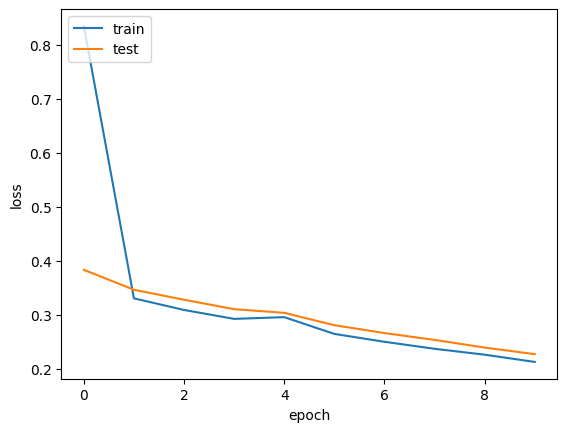

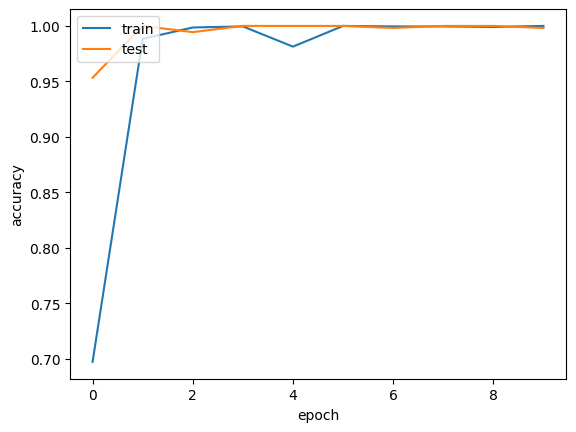

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
# test_tensorflow.py
import tensorflow as tf
from tensorflow.keras.models import load_model

print("TensorFlow version:", tf.__version__)
print("Keras model load function:", load_model)


TensorFlow version: 2.15.0
Keras model load function: <function load_model at 0x7879803a6dd0>
